In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [7]:
def get_smoke_count(smoking_status):
    mask=df['smoking_status']==smoking_status
    return df[mask]

In [8]:
get_smoke_count('Unknown')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [9]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
null_values = df['bmi'].isnull().sum()
null_values

201

In [12]:
null_percentage = df['bmi'].isnull().mean()*100
null_percentage

3.9334637964774952

In [13]:
column_mean = df['bmi'].mean()
df['bmi'].fillna(column_mean, inplace=True)

In [14]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
columns = ['gender','ever_married','work_type', 'Residence_type','smoking_status']

for col in columns:
    unique_values = df[col].unique()
    print(f"Unique values for{col}:{unique_values}")

Unique values forgender:['Male' 'Female' 'Other']
Unique values forever_married:['Yes' 'No']
Unique values forwork_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values forResidence_type:['Urban' 'Rural']
Unique values forsmoking_status:['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [16]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [17]:
# In gender column there is only one value for other so we replace it with male
df['gender'] = df['gender'].replace('Other', 'Male')

In [18]:
df['gender'].value_counts()

gender
Female    2994
Male      2116
Name: count, dtype: int64

In [19]:
mask1 = df[['gender','ever_married','work_type', 'Residence_type','smoking_status']].nunique()
mask1

gender            2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


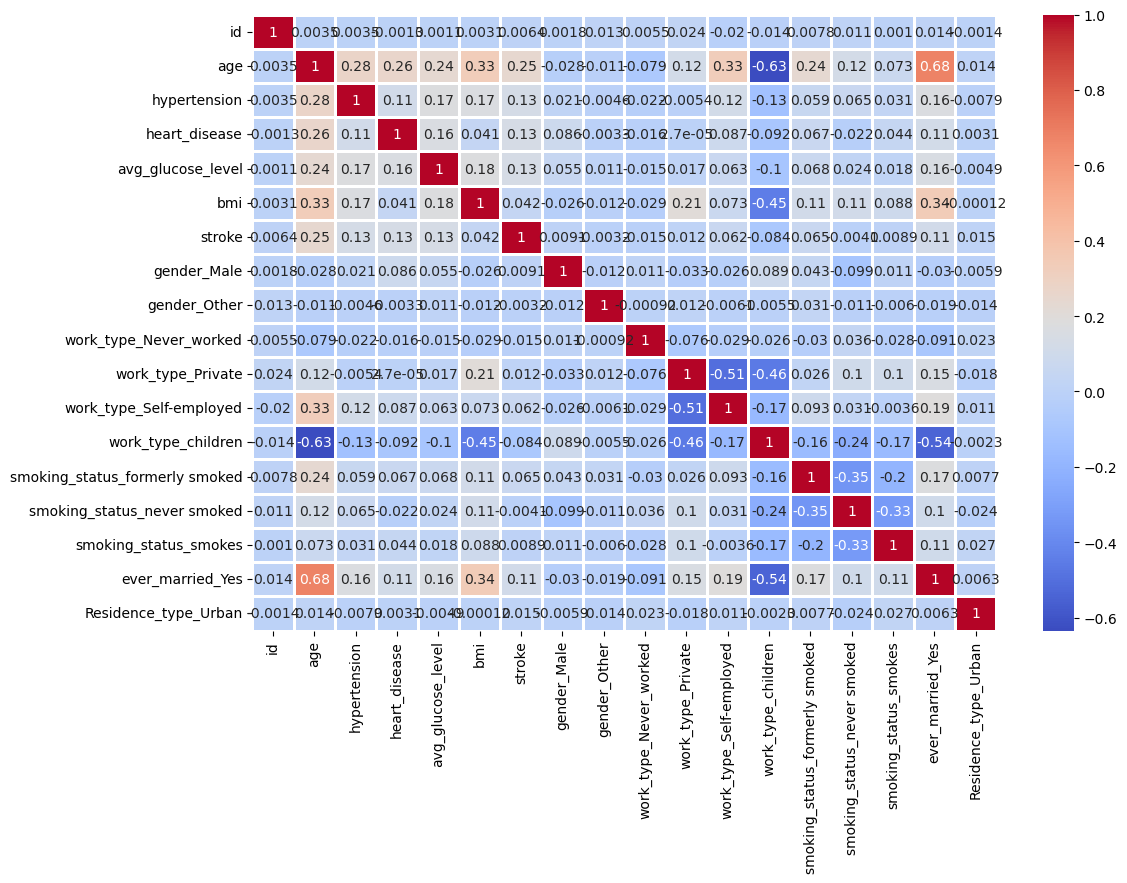

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
file_path = "healthcare-dataset-stroke-data.csv"
dataset = pd.read_csv(file_path)

# Encode categorical variables (one-hot encoding)
categorical_columns = ['gender', 'work_type', 'smoking_status', 'ever_married', 'Residence_type']
dataset_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = dataset_encoded.corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)

# Show the heatmap
plt.show()


# Feature Engineering

In [22]:
# Creating age group categories

print(f'maximum age variable: {df["age"].max()}')
print(f'minimum age variable: {df["age"].min()}')
print(f'Number of age variable: {df["age"].nunique()}')

maximum age variable: 82.0
minimum age variable: 0.08
Number of age variable: 104


In [23]:
# collapse age group categories
ranges = [0,13,18,45,60,100]
group_names = ['Children','Teens','Adults','Mid-adults','Elderly']
df['age_group'] = pd.cut(df['age'],bins=ranges,labels=group_names)
df['age_group'].unique()

['Elderly', 'Mid-adults', 'Adults', 'Children', 'Teens']
Categories (5, object): ['Children' < 'Teens' < 'Adults' < 'Mid-adults' < 'Elderly']

In [24]:
# For BMI

print(f'maximum age variable: {df["bmi"].max()}')
print(f'minimum age variable: {df["bmi"].min()}')
print(f'Number of age variable: {df["bmi"].nunique()}')

maximum age variable: 97.6
minimum age variable: 10.3
Number of age variable: 419


In [25]:
# collapse bmi into fewer groups

ranges = [0,19,25,30,100]
group_names = ['Underweight', 'Normal', 'Overweight', 'Obesity']
df['bmi_group'] = pd.cut(df['bmi'],bins=ranges,labels=group_names)
df['bmi_group'].unique()

['Obesity', 'Overweight', 'Normal', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obesity']

In [26]:
# for avg glucose level

print(f'maximum age variable: {df["avg_glucose_level"].max()}')
print(f'minimum age variable: {df["avg_glucose_level"].min()}')
print(f'Number of age variable: {df["avg_glucose_level"].nunique()}')

maximum age variable: 271.74
minimum age variable: 55.12
Number of age variable: 3979


In [27]:
ranges = [0, 70, 99, 125, 280]
group_names = ['Low', 'Normal', 'High', 'Very_high']
df['avg_glucose_level_group'] = pd.cut(df['avg_glucose_level'],bins=ranges,labels=group_names)
df['avg_glucose_level_group'].unique()

['Very_high', 'High', 'Normal', 'Low']
Categories (4, object): ['Low' < 'Normal' < 'High' < 'Very_high']

# Exploratory data analysis(EDA)

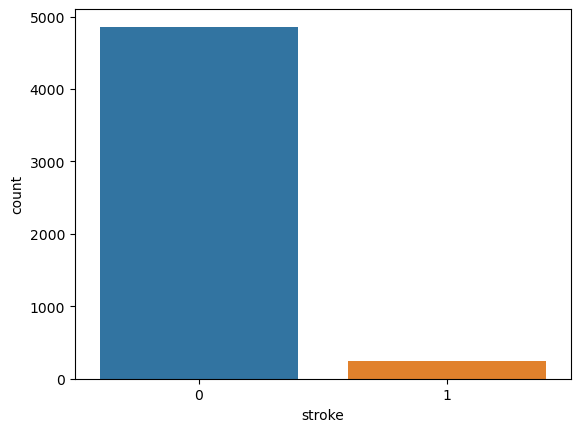

In [28]:
sns.countplot(x='stroke',data=df)
plt.show()

In [29]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,avg_glucose_level_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Elderly,Obesity,Very_high
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Elderly,Overweight,Very_high
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Elderly,Obesity,High
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Mid-adults,Obesity,Very_high
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Elderly,Normal,Very_high


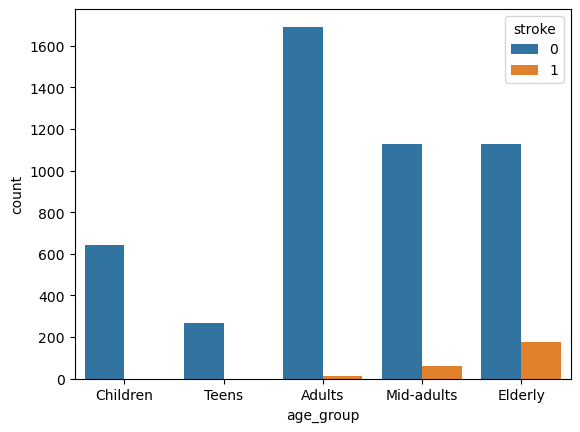

In [30]:
sns.countplot(x='age_group',hue='stroke',data=df)
plt.show()

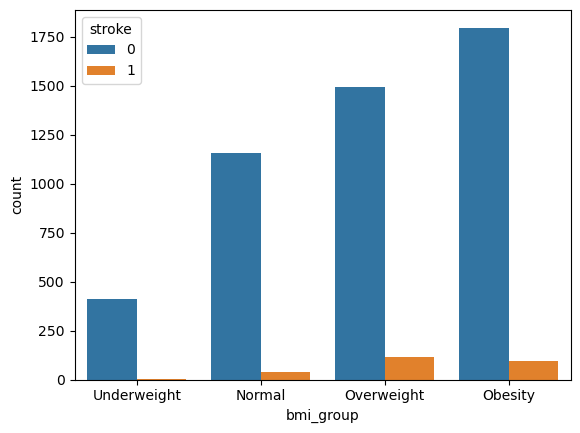

In [31]:
sns.countplot(x='bmi_group',hue='stroke',data=df)
plt.show()

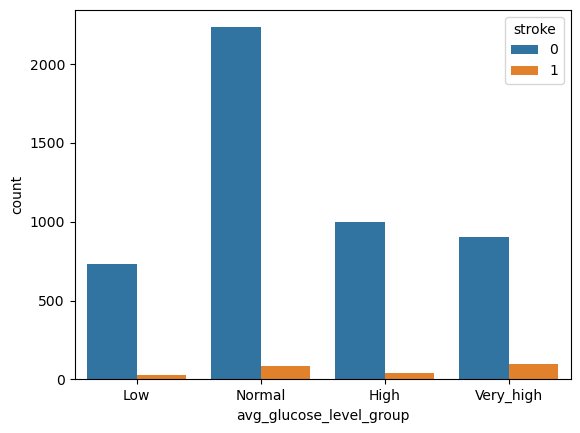

In [32]:
sns.countplot(x='avg_glucose_level_group',hue='stroke',data=df)
plt.show()

<Axes: xlabel='heart_disease', ylabel='age'>

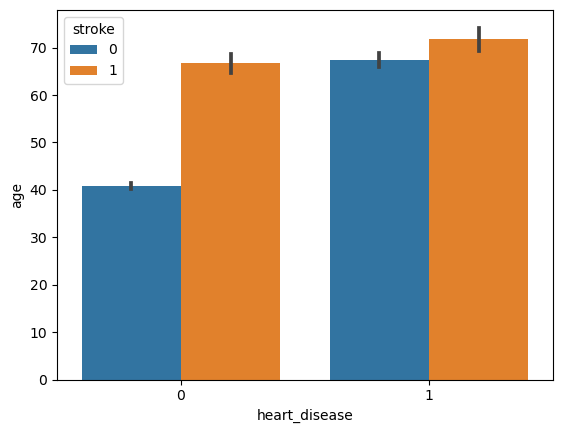

In [33]:
sns.barplot(x='heart_disease',y='age',data=df,hue='stroke')

In [34]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,avg_glucose_level_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Elderly,Obesity,Very_high
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Elderly,Overweight,Very_high
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Elderly,Obesity,High
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Mid-adults,Obesity,Very_high
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Elderly,Normal,Very_high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Elderly,Overweight,Normal
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Elderly,Obesity,Very_high
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Adults,Obesity,Normal
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Mid-adults,Overweight,Very_high


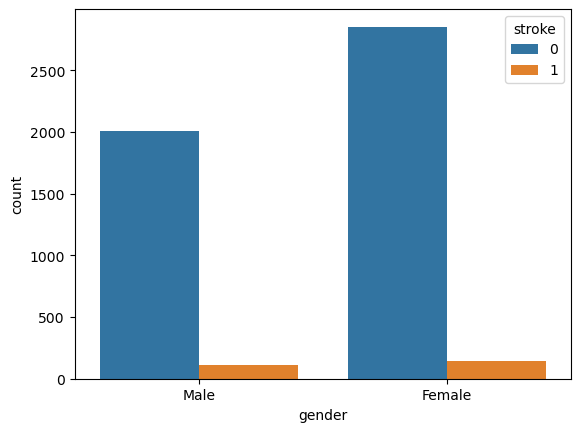

In [35]:
sns.countplot(x='gender',hue='stroke',data=df)
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


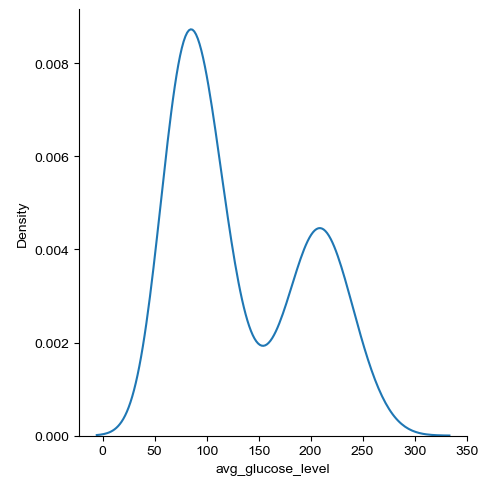

In [36]:
stroke = df[df['stroke']==1]
sns.displot(stroke['avg_glucose_level'], kind='kde')
sns.set_style('darkgrid')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


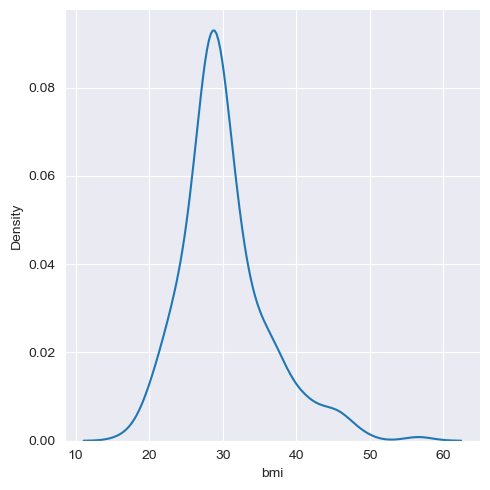

In [37]:
stroke = df[df['stroke']==1]
sns.displot(stroke['bmi'], kind='kde')
sns.set_style('darkgrid')
plt.show()

# Preprocessing

### Binary Encoding

In [38]:
#Instantiate LabelEncoder
labelencoder = LabelEncoder()

#Binary Encoding(encoding object columns with 2 unique values)
binary_cols =  ['ever_married', 'Residence_type', 'gender']
for col in binary_cols:
    df[col]=labelencoder.fit_transform(df[col])

### Label Encoding

In [39]:
categorical_cols = ['age_group', 'bmi_group', 'avg_glucose_level_group']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

## One hot encoding

In [40]:
#Encode object columns that more than 2 unique values
df = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'hypertension', 'heart_disease'], drop_first=True)

In [41]:
df

,id,gender,age,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,bmi_group,avg_glucose_level_group,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_1,heart_disease_1
0,9046,1,67.0,1,1,228.69,36.600000,1,2,1,3,False,True,False,False,True,False,False,False,True
1,51676,0,61.0,1,0,202.21,28.893237,1,2,2,3,False,False,True,False,False,True,False,False,False
2,31112,1,80.0,1,0,105.92,32.500000,1,2,1,0,False,True,False,False,False,True,False,False,True
3,60182,0,49.0,1,1,171.23,34.400000,1,3,1,3,False,True,False,False,False,False,True,False,False
4,1665,0,79.0,1,0,174.12,24.000000,1,2,0,3,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,1,83.75,28.893237,0,2,2,2,False,True,False,False,False,True,False,True,False
5106,44873,0,81.0,1,1,125.20,40.000000,0,2,1,3,False,False,True,False,False,True,False,False,False
5107,19723,0,35.0,1,0,82.99,30.600000,0,0,1,2,False,False,True,False,False,True,False,False,False
5108,37544,1,51.0,1,0,166.29,25.600000,0,3,2,3,False,True,False,False,True,False,False,False,False


In [42]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

#### It looks like our data is imbalanced, so we have to resample it.

In [43]:
# handle Imbalance data
stroke_0=df[df['stroke']==0]
stroke_1=df[df['stroke']==1]

In [44]:
# resample
from sklearn.utils import resample
df_upsampled=resample(stroke_1,replace=True,n_samples=4700)

In [45]:
new_df=pd.concat([stroke_0,df_upsampled])
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [46]:
new_df['stroke'].value_counts()

stroke
0    4861
1    4700
Name: count, dtype: int64

In [47]:
X = new_df.drop(columns =['id','stroke'])
y= new_df['stroke']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6692, 18)
(2869, 18)
(6692,)
(2869,)


In [49]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
# fit the scaler to the train set, it will learn parameters
Scaler.fit(X_train)

#transform train and test set

X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

### Now lets compare accuracy using Different Algorithms

# 1) Logistic Regression

In [50]:
logistic_reg = LogisticRegression()

In [51]:
logistic_reg.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred = logistic_reg.predict(X_test)

In [53]:
log_reg_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {log_reg_accuracy}")

Accuracy: 0.7720460090623911


#### lets evaluate Accuracy of  model

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1469
           1       0.74      0.82      0.78      1400

    accuracy                           0.77      2869
   macro avg       0.77      0.77      0.77      2869
weighted avg       0.78      0.77      0.77      2869



#### sample explaination
![](https://i.stack.imgur.com/Wsz2t.png)

# 2) Decision Tree

In [55]:
# Create the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()

In [56]:
# Train the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

In [58]:
# Calculate the accuracy of the classifier
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dt_accuracy}")

Accuracy: 0.9773440223074242


# Visualization Of  Decision Tree

[Text(0.3689628220309612, 0.98, 'age <= 53.5\ngini = 0.5\nsamples = 6692\nvalue = [3392, 3300]'),
 Text(0.10680452865064695, 0.94, 'age <= 44.5\ngini = 0.264\nsamples = 2655\nvalue = [2239, 416]'),
 Text(0.05198706099815157, 0.9, 'work_type_Self-employed <= 0.5\ngini = 0.121\nsamples = 1874\nvalue = [1753, 121]'),
 Text(0.02634011090573013, 0.86, 'avg_glucose_level <= 58.115\ngini = 0.082\nsamples = 1719\nvalue = [1645, 74]'),
 Text(0.0073937153419593345, 0.82, 'avg_glucose_level <= 57.86\ngini = 0.463\nsamples = 66\nvalue = [42, 24]'),
 Text(0.0036968576709796672, 0.78, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.011090573012939002, 0.78, 'gender <= 0.5\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.0073937153419593345, 0.74, 'smoking_status_never smoked <= 0.5\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(0.0036968576709796672, 0.7, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.011090573012939002, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Te

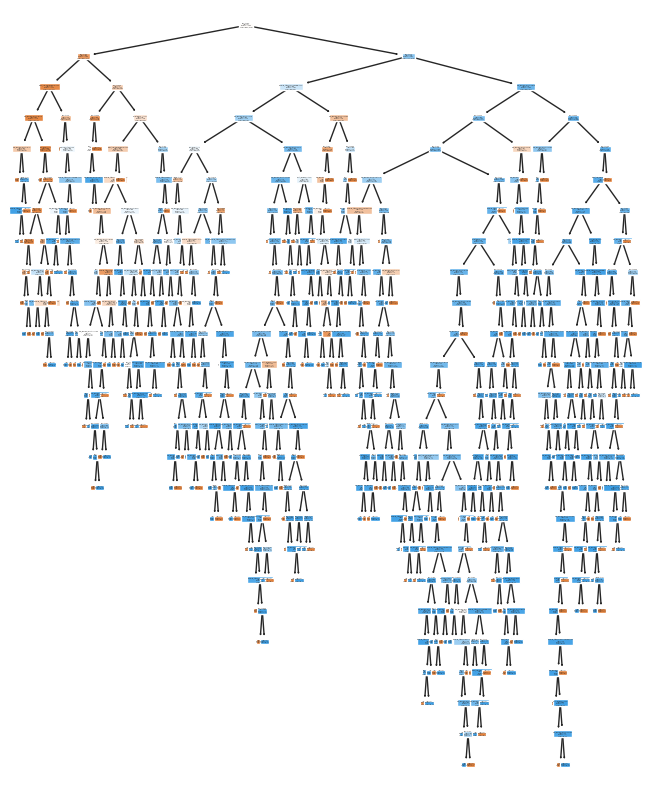

In [59]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(8, 10))

# Convert the index of X (assuming X is your DataFrame) to a list of feature names
feature_names = X.columns.tolist()

# Plot the decision tree without specifying class names
plot_tree(decision_tree_classifier, feature_names=feature_names, class_names=None, filled=True)


#### lets evaluate Accuracy of model

In [60]:
predictions = decision_tree_classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1469
           1       0.96      1.00      0.98      1400

    accuracy                           0.98      2869
   macro avg       0.98      0.98      0.98      2869
weighted avg       0.98      0.98      0.98      2869



# 3) Random forest Classifier

In [61]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy}")

Accuracy: 0.9916347159288951


# Visualization Of Random Forest

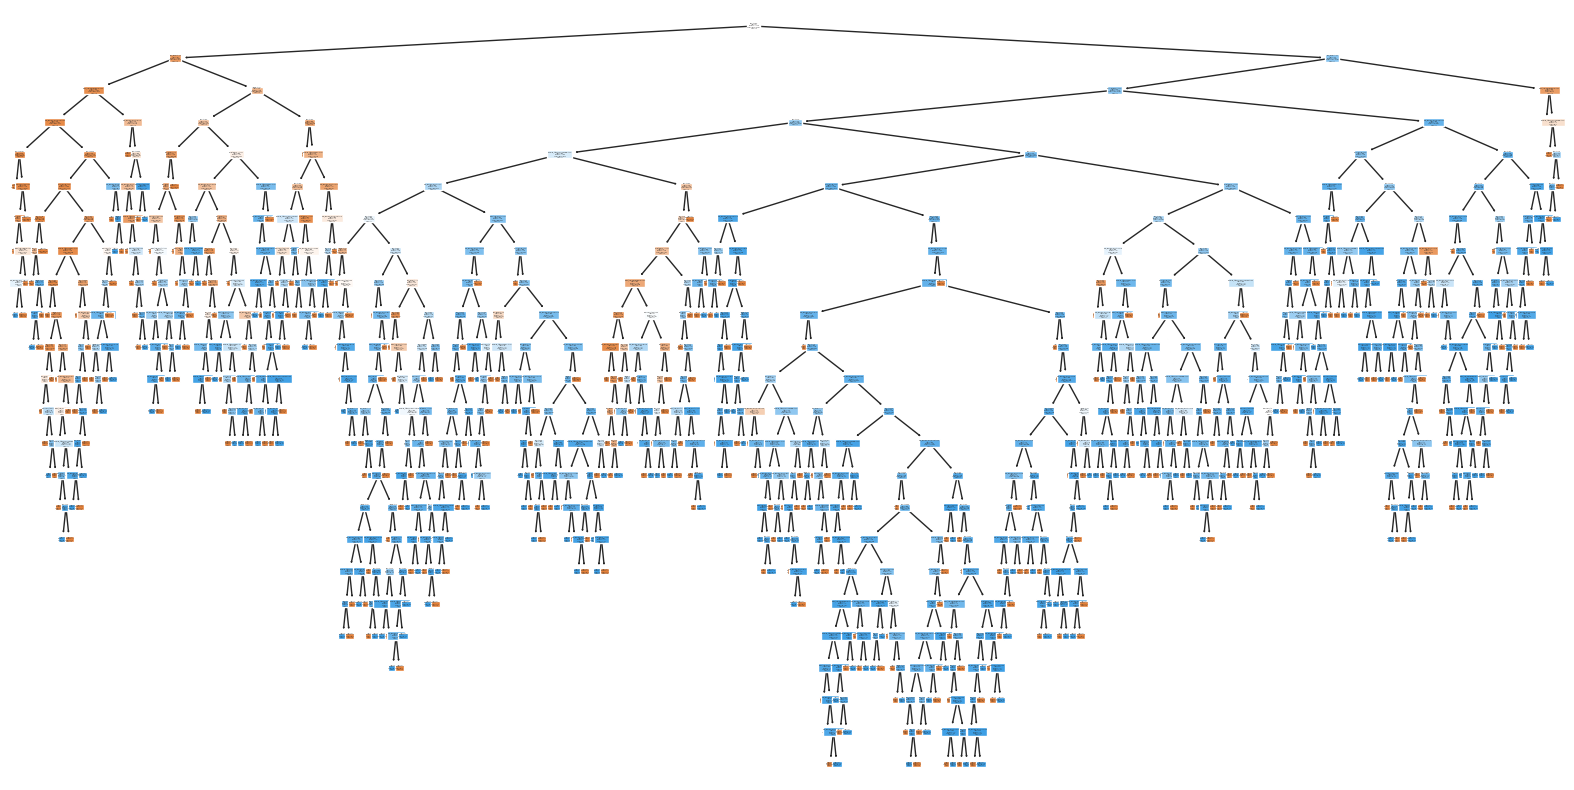

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier  # Example classifier, replace with your classifier

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Perform data preprocessing (e.g., one-hot encoding categorical variables and handling missing values)
# Replace 'X' and 'y' with your feature matrix and target variable

# Train a decision tree classifier (replace RandomForestClassifier with your classifier)
classifier = RandomForestClassifier()  # Example classifier, replace with your classifier
classifier.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Convert the index of X (assuming X is your DataFrame) to a list of feature names
feature_names = X.columns.tolist()

plot_tree(classifier.estimators_[0], feature_names=feature_names, class_names=['0', '1'], filled=True)  # Adjust class_names if it's a classification problem
plt.show()


##### lets evaluate Accuracy of model

In [63]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1445   24]
 [   0 1400]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1469
           1       0.98      1.00      0.99      1400

    accuracy                           0.99      2869
   macro avg       0.99      0.99      0.99      2869
weighted avg       0.99      0.99      0.99      2869



## Hyperparameter Tunning By GridSearchCV Method.

In [64]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [65]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, scoring="f1_weighted")

In [68]:

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_weighted')

In [69]:
grid_search.best_score_

0.9343733964025687

In [70]:
grid_search.cv_results_ 

{'mean_fit_time': array([0.04834266, 0.09760251, 0.10558782, 0.14098744, 0.28402801,
        0.52369499, 0.12543797, 0.07980399, 0.1089869 , 0.17046537,
        0.28629999, 0.61371717, 0.08592076, 0.08653769, 0.11243997,
        0.15022111, 0.30995636, 0.64327774, 0.06184239, 0.10526233,
        0.11174626, 0.15782142, 0.29277096, 0.65631537, 0.09456601,
        0.10145078, 0.09261041, 0.1594131 , 0.31038871, 0.58785291,
        0.08537197, 0.09449482, 0.09624581, 0.16453919, 0.29863639,
        0.61152997, 0.08031855, 0.09804773, 0.11531572, 0.16371078,
        0.32594838, 0.69647112, 0.06179399, 0.09293766, 0.12886701,
        0.1620039 , 0.32294154, 0.60684581, 0.10120287, 0.1096571 ,
        0.10725174, 0.16071868, 0.30161815, 0.6047945 , 0.08389707,
        0.08642192, 0.10450501, 0.17159529, 0.31070971, 0.66154871,
        0.06396818, 0.1155695 , 0.10880108, 0.14688473, 0.31762528,
        0.66697173, 0.08581181, 0.13020058, 0.12905731, 0.14213066,
        0.31413231, 0.69089918,

In [71]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [72]:
rf_best.score(X_train,y_train)

0.9675732217573222

In [73]:
rf_best.score(X_test,y_test)

0.9449285465318926

In [74]:
yhat = rf_best.predict(X_test)

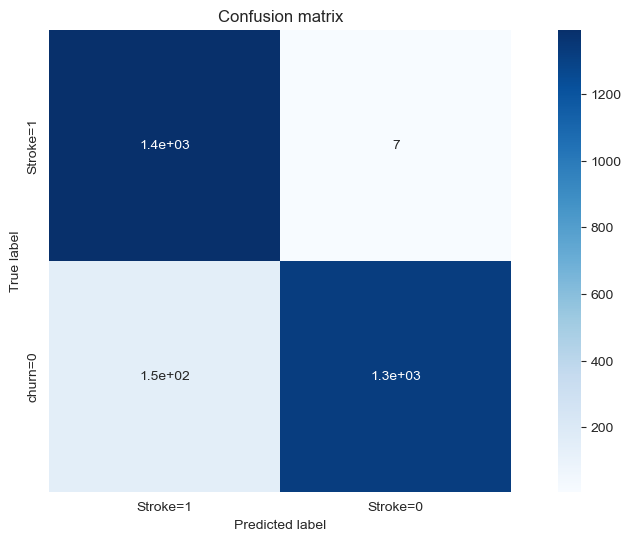

In [75]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
plt.figure(figsize=(12,6))
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Stroke=1','Stroke=0'],yticklabels=['Stroke=1','churn=0'], cmap='Blues', square=True);
plt.xlabel('Predicted label');
plt.ylabel('True label');
plt.title('Confusion matrix');

In [76]:
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))

[[1318  151]
 [   7 1393]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1469
           1       0.90      0.99      0.95      1400

    accuracy                           0.94      2869
   macro avg       0.95      0.95      0.94      2869
weighted avg       0.95      0.94      0.94      2869



# Feature Importance

In [77]:
rf_best.feature_importances_

array([1.49667099e-02, 3.29353557e-01, 3.86485167e-02, 1.63009806e-02,
       1.46716623e-01, 1.47882747e-01, 1.22505691e-01, 2.40597483e-02,
       2.50942133e-02, 2.41911882e-06, 1.49377874e-02, 1.52600163e-02,
       9.78283746e-03, 1.36703888e-02, 1.93601863e-02, 1.12278296e-02,
       2.90238483e-02, 2.12059000e-02])

In [78]:
X.columns

Index(['gender', 'age', 'ever_married', 'Residence_type', 'avg_glucose_level',
       'bmi', 'age_group', 'bmi_group', 'avg_glucose_level_group',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'hypertension_1', 'heart_disease_1'],
      dtype='object')

In [79]:
imp_df = pd.DataFrame({
    "Features": X.columns,
    "Imp": rf_best.feature_importances_
})

In [80]:
imp_df.sort_values(by="Imp", ascending=False)

,Features,Imp
1,age,0.329354
5,bmi,0.147883
4,avg_glucose_level,0.146717
6,age_group,0.122506
2,ever_married,0.038649
16,hypertension_1,0.029024
8,avg_glucose_level_group,0.025094
7,bmi_group,0.024060
17,heart_disease_1,0.021206
14,smoking_status_never smoked,0.019360


In [81]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [82]:
model =RandomForestClassifier() 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


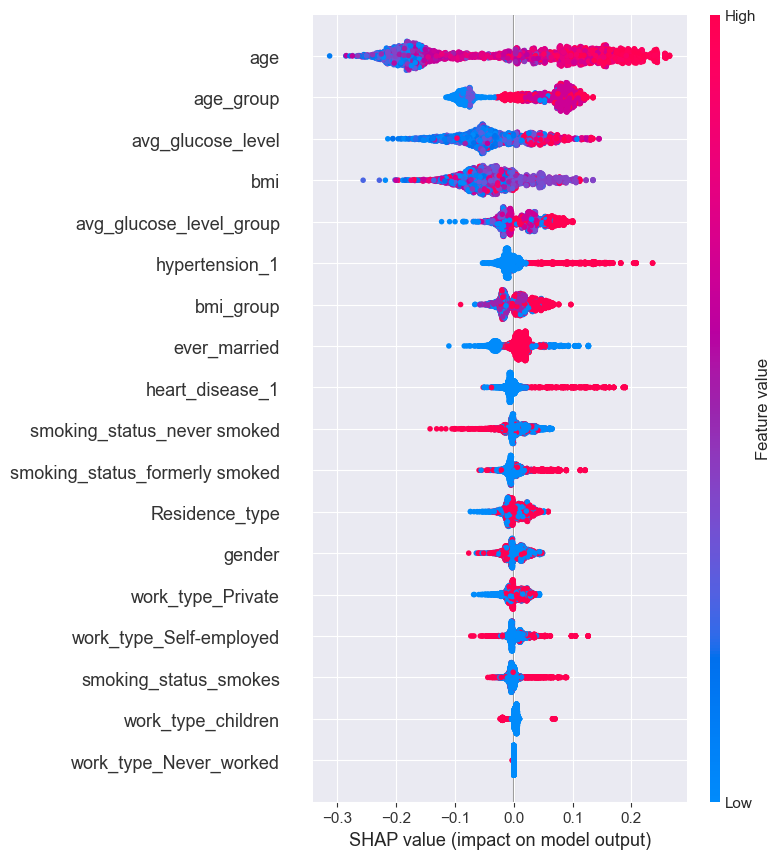

In [83]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for the positive class (class index 1)
shap.summary_plot(shap_values[1], X_test)



"""Positive SHAP Value (Red): When a feature's value is high (farther to the right on the x-axis) and contributes to increasing the model's prediction, it will have a positive SHAP value. The color of the bar will be in shades of red, with brighter red indicating higher positive values.

Negative SHAP Value (Blue): When a feature's value is low (closer to the left on the x-axis) and contributes to decreasing the model's prediction, it will have a negative SHAP value. The color of the bar will be in shades of blue, with brighter blue indicating higher negative values.

Here's how to interpret the plot:

Feature Order: Features are ordered vertically based on their average absolute SHAP values. Features with the most significant impact on the model's predictions are at the top.

Feature Importance: Longer bars indicate features that have a stronger impact on the model's predictions. The direction of the bar (left or right) indicates whether the feature contributes positively or negatively to the prediction."""

In [84]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load a sample dataset for demonstration (you should replace this with your own dataset)
data = load_iris()
X, y = data.data, data.target

# Create and train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Save the model to a file
joblib.dump(rf_model, 'rf_model.pkl')

# Load the model from the file
loaded_rf_model = joblib.load('rf_model.pkl')

# Now, you can use 'loaded_rf_model' for predictions
